# Plot net TOA energy budget from CERES observations

#### This is similar to plots from Manabe and Stouffer (1980). Figure 13 and 19.

### Do imports

In [1]:
import sys
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/spectral_ice/')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/spectral_ice/Common/') # is this good or not good. I should reorg.
# sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable, cmaps,
    glob, copy
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, regress_1d,
    to_png, polarCentral_set_latlim, add_map_features,
    stats, plot_trends, MidpointNormalize
    )

import copy
from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load CERES data

I am using files from Brian Medeiros (most recent, somehow processed)

In [2]:
ceres_savedir = '/glade/work/jonahshaw/obs/CERES/tseries/'

ceres_path = '/glade/work/brianpm/observations/ceres'
ceres_files = glob.glob('%s/CERES_EBAF_Ed4.1_Subset*.nc' % ceres_path)
ceres_files.sort()

In [3]:
all_ceres = xr.open_mfdataset(ceres_files)

In [8]:
sfc_net_sw_all = all_ceres['sfc_net_sw_all_mon'].sel(lat=slice(70,None)).groupby('time.month').mean('time').mean(dim=['lat','lon'])

sfc_lw_up_all = all_ceres['sfc_lw_up_all_mon'].sel(lat=slice(70,None)).groupby('time.month').mean('time').mean(dim=['lat','lon'])

In [10]:
ceres_savedir = '/glade/work/jonahshaw/obs/CERES/tseries/'

all_ceres['sfc_net_sw_all_mon'].to_netcdf('%s/CERES_EBAF_Ed4.1_ASR_SFC_200003-202102.nc' % ceres_savedir)
all_ceres['sfc_lw_up_all_mon'].to_netcdf('%s/CERES_EBAF_Ed4.1_OLR_SFC_200003-202102.nc' % ceres_savedir)

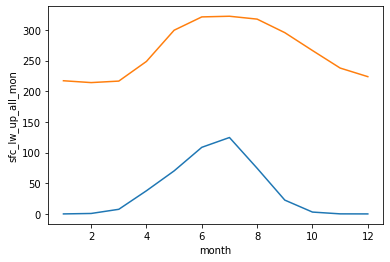

In [9]:
sfc_net_sw_all.plot()
sfc_lw_up_all.plot()

In [5]:
all_ceres['sfc_lw_up_all_mon']

,Array,Chunk
Bytes,65.32 MB,259.20 kB
Shape,"(252, 180, 360)","(1, 180, 360)"
Count,756 Tasks,252 Chunks
Type,float32,numpy.ndarray


In [4]:
all_ceres

,Array,Chunk
Bytes,65.32 MB,259.20 kB
Shape,"(252, 180, 360)","(1, 180, 360)"
Count,756 Tasks,252 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,65.32 MB,259.20 kB
Shape,"(252, 180, 360)","(1, 180, 360)"
Count,756 Tasks,252 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [16]:
# Loaded save timeseries or process them from Brian Medeiros' monthly data
if os.path.exists('%s/CERES_EBAF_Ed4.1_ASR_200003-202102.nc' % ceres_savedir):
    ceres_asr = xr.open_dataset('%s/CERES_EBAF_Ed4.1_ASR_200003-202102.nc' % ceres_savedir)
    
if os.path.exists('%s/CERES_EBAF_Ed4.1_OLR_200003-202102.nc' % ceres_savedir):
    ceres_olr = xr.open_dataset('%s/CERES_EBAF_Ed4.1_OLR_200003-202102.nc' % ceres_savedir)

if (not os.path.exists('%s/CERES_EBAF_Ed4.1_OLR_200003-202102.nc' % ceres_savedir)) or (not os.path.exists('%s/CERES_EBAF_Ed4.1_ASR_200003-202102.nc' % ceres_savedir)):    
    all_ceres = xr.open_mfdataset(ceres_files)
    
    if not os.path.exists('%s/CERES_EBAF_Ed4.1_ASR_200003-202102.nc' % ceres_savedir):
        ceres_asr = all_ceres['solar_mon'] - all_ceres['toa_sw_all_mon']
        
    if not os.path.exists('%s/CERES_EBAF_Ed4.1_OLR_200003-202102.nc' % ceres_savedir):
        ceres_olr = all_ceres['toa_lw_all_mon']

In [22]:
olr_arc = add_weights(ceres_olr['OLR'].sel(lat=slice(70,None)))

olr_arc_spatialavg = masked_average(olr_arc,dim=['lat','lon'],weights=olr_arc['cell_weight'])

olr_arc_monspatialavg = olr_arc_spatialavg.groupby('time.month').mean('time')

In [26]:
asr_arc = add_weights(ceres_asr['ASR'].sel(lat=slice(70,None)))

asr_arc_spatialavg = masked_average(asr_arc,dim=['lat','lon'],weights=asr_arc['cell_weight'])

asr_arc_monspatialavg = asr_arc_spatialavg.groupby('time.month').mean('time')

In [25]:
olr_arc_monspatialavg

<xarray.DataArray (month: 12)>
array([175.30553, 176.19978, 179.44925, 194.80139, 213.29079, 227.04323,
       231.21906, 223.8256 , 210.12553, 195.26439, 182.9146 , 176.47522],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [27]:
asr_arc_monspatialavg

<xarray.DataArray (month: 12)>
array([-1.1410834e-01,  3.3604918e+00,  3.1204386e+01,  9.5608032e+01,
        1.6736168e+02,  2.3552859e+02,  2.4150609e+02,  1.5723473e+02,
        6.2963554e+01,  1.1053784e+01,  3.2235511e-02,  0.0000000e+00],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

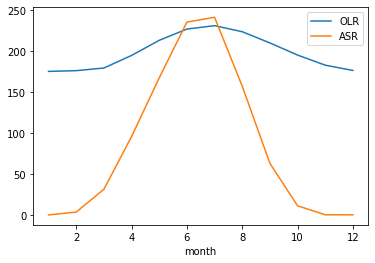

In [29]:
olr_arc_monspatialavg.plot(label='OLR')
asr_arc_monspatialavg.plot(label='ASR')

plt.legend()

In [30]:
asr_arc_monspatialavg_wrapped = xr.concat([asr_arc_monspatialavg,asr_arc_monspatialavg[0].assign_coords({'month':13})],dim='month')
olr_arc_monspatialavg_wrapped = xr.concat([olr_arc_monspatialavg,olr_arc_monspatialavg[0].assign_coords({'month':13})],dim='month')


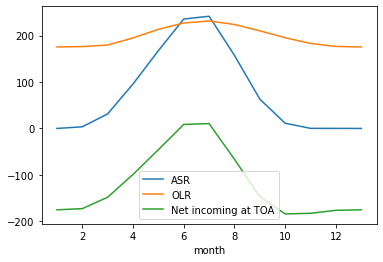

In [32]:
asr_arc_monspatialavg_wrapped.plot(label='ASR')
olr_arc_monspatialavg_wrapped.plot(label='OLR')

(asr_arc_monspatialavg_wrapped - olr_arc_monspatialavg_wrapped).plot(label='Net incoming at TOA')

plt.legend()

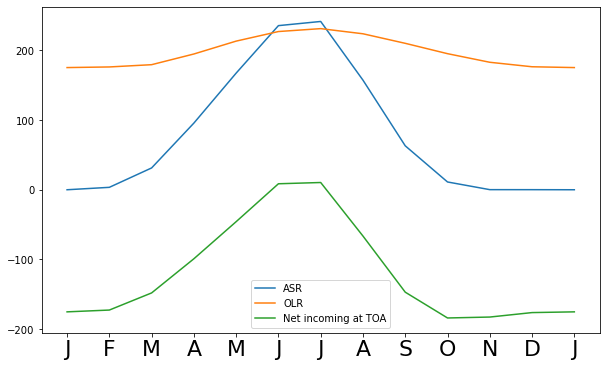

In [36]:
rad_fig,rad_ax = plt.subplots(1,1,figsize=(10,6))

# ytick_labels = np.array([60,70,90])
# yticks = np.sin(np.pi*ytick_labels/180)

xtick_labels = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
xticks = np.arange(0,12.01,1)

# Set axis ticks accounting for area weighting
# rad_ax.set_ylim(np.sin(np.pi/3),1)
# rad_ax.set_yticks(yticks)
# rad_ax.set_yticklabels(ytick_labels,fontsize=22)
rad_ax.set_xticks(xticks)
rad_ax.set_xticklabels(xtick_labels,fontsize=22)

rad_ax.plot(asr_arc_monspatialavg_wrapped,label='ASR')
rad_ax.plot(olr_arc_monspatialavg_wrapped,label='OLR')
rad_ax.plot((asr_arc_monspatialavg_wrapped - olr_arc_monspatialavg_wrapped),label='Net incoming at TOA')

plt.legend()